<a href="https://colab.research.google.com/github/RafaelPersano/Flowisetutorial/blob/main/NBAbets6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Qual a odd mínima que você deseja apostar? 1.5
Qual a odd máxima que você deseja apostar? 1.89
Quantos dias você deseja simular? 100
Simulação de 100 dias

--- Dia 1 ---
Jogador: LeBron James vs Team A | Jogada: acima de 29.6 pts
Risco: 1.39 | Confiabilidade: 61.57% | Odds: 1.62
Parabéns! Você ganhou a aposta.
Nova banca: R$ 1031.00
Saldo preservado: R$ 0.00

--- Dia 2 ---
Jogador: LeBron James vs Team A | Jogada: acima de 27.4 pts
Risco: 1.39 | Confiabilidade: 66.51% | Odds: 1.5
Parabéns! Você ganhou a aposta.
Nova banca: R$ 1056.00
Saldo preservado: R$ 0.00

--- Dia 3 ---
Jogador: LeBron James vs Team A | Jogada: acima de 33.6 pts
Risco: 1.39 | Confiabilidade: 54.24% | Odds: 1.84
Infelizmente você perdeu a aposta.
Nova banca: R$ 1006.00
Saldo preservado: R$ 0.00

--- Dia 4 ---
Jogador: Giannis Antetokounmpo vs Team A | Jogada: acima de 33.6 pts
Risco: 1.35 | Confiabilidade: 59.81% | Odds: 1.67
Infelizmente você perdeu a aposta.
Nova banca: R$ 956.00
Saldo preservado: R$ 0.00

--- Dia

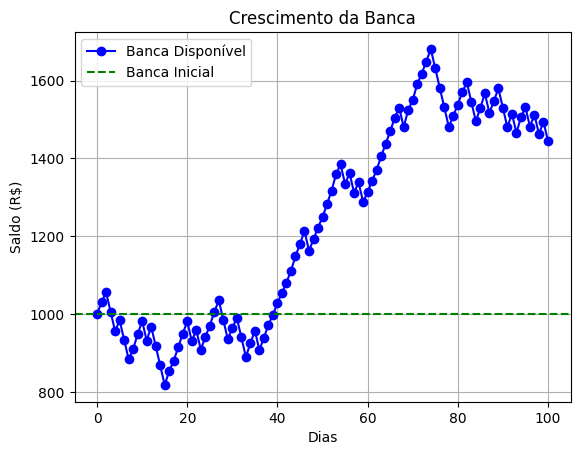

Simulação encerrada.
Banca final: R$ 1444.50
Saldo preservado total: R$ 0.00


In [15]:
import random
import matplotlib.pyplot as plt

# Banco de dados fictício de jogadores e suas médias de pontos
players_data = {
    "LeBron James": {"avg_points": 27.0, "historical_hit_rate": 0.75},
    "Stephen Curry": {"avg_points": 30.0, "historical_hit_rate": 0.78},
    "Kevin Durant": {"avg_points": 28.0, "historical_hit_rate": 0.72},
    "Luka Dončić": {"avg_points": 32.0, "historical_hit_rate": 0.80},
    "Giannis Antetokounmpo": {"avg_points": 29.0, "historical_hit_rate": 0.77}
}

# Banco de dados fictício de adversários e sua qualidade defensiva
opponents_data = {
    "Team A": {"defensive_rating": 0.9},  # Defesa forte
    "Team B": {"defensive_rating": 1.0},  # Defesa média
    "Team C": {"defensive_rating": 1.1}   # Defesa fraca
}

def calculate_risk_and_confidence(player, opponent, points_line):
    """
    Calcula o grau de risco, confiabilidade e odds da aposta com base no desempenho histórico
    do jogador e na força defensiva do adversário.
    """
    player_data = players_data[player]
    opponent_data = opponents_data[opponent]

    # Ajusta a média de pontos com base na qualidade defensiva do adversário
    adjusted_avg = player_data["avg_points"] * opponent_data["defensive_rating"]

    # Grau de risco: odds inversamente proporcionais à chance de acerto
    hit_chance = player_data["historical_hit_rate"] * (adjusted_avg / points_line)
    odds = round(1 / hit_chance, 2) if hit_chance > 0 else 100.0

    # Risco e confiabilidade
    risk = round(2.0 - (adjusted_avg / 40), 2)  # Exemplo de cálculo fictício
    confidence = round(hit_chance * 100, 2)

    return risk, confidence, odds

# Função para gerar sugestões de apostas
def generate_bet_suggestion():
    player = random.choice(list(players_data.keys()))
    opponent = random.choice(list(opponents_data.keys()))
    points_line = round(random.uniform(20, 35), 1)

    risk, confidence, odds = calculate_risk_and_confidence(player, opponent, points_line)

    return {
        "player": player,
        "opponent": opponent,
        "points_line": points_line,
        "risk": risk,
        "confidence": confidence,
        "odds": odds
    }

# Pergunta ao usuário a faixa de odds desejada
min_odd = float(input("Qual a odd mínima que você deseja apostar? "))
max_odd = float(input("Qual a odd máxima que você deseja apostar? "))

# Pergunta ao usuário o número de dias da simulação
num_days = int(input("Quantos dias você deseja simular? "))

# Simulação principal
initial_bankroll = 1000.00
meta_diaria = 50.00
bankroll = initial_bankroll
saldo_diario = [bankroll]
saldo_preservado = 0


def simulate_day(day):
    global bankroll, saldo_preservado
    bet = generate_bet_suggestion()

    # Verifica se a odd está dentro da faixa desejada
    if not (min_odd <= bet["odds"] <= max_odd):
        return False  # Ignora a aposta se estiver fora da faixa

    # Determina se a aposta é ganha ou perdida com base na confiabilidade
    hit_chance = bet["confidence"] / 100
    bet_result = random.random() < hit_chance

    if bet_result:
        bankroll += meta_diaria * (bet["odds"] - 1)
        result = "Parabéns! Você ganhou a aposta."
    else:
        bankroll -= meta_diaria
        result = "Infelizmente você perdeu a aposta."

    # Estratégia de preservação: salva 10% do crescimento da banca inicial
    if bankroll > initial_bankroll * (1 + (len(saldo_diario) * 0.1)):
        lucro_preservado = bankroll - initial_bankroll
        saldo_preservado += lucro_preservado
        bankroll -= lucro_preservado

    saldo_diario.append(bankroll)

    print(f"--- Dia {day} ---")
    print(f"Jogador: {bet['player']} vs {bet['opponent']} | Jogada: acima de {bet['points_line']} pts")
    print(f"Risco: {bet['risk']} | Confiabilidade: {bet['confidence']}% | Odds: {bet['odds']}")
    print(result)
    print(f"Nova banca: R$ {bankroll:.2f}")
    print(f"Saldo preservado: R$ {saldo_preservado:.2f}\n")

    return True

# Simulação do número de dias especificado
print(f"Simulação de {num_days} dias\n")
for day in range(1, num_days + 1):
    while not simulate_day(day):
        pass  # Continua tentando até encontrar uma aposta válida

# Plotando o gráfico de crescimento da banca
plt.plot(saldo_diario, marker='o', linestyle='-', color='b', label='Banca Disponível')
plt.axhline(y=initial_bankroll, color='g', linestyle='--', label='Banca Inicial')
plt.title('Crescimento da Banca')
plt.xlabel('Dias')
plt.ylabel('Saldo (R$)')
plt.legend()
plt.grid(True)
plt.show()

print("Simulação encerrada.")
print(f"Banca final: R$ {bankroll:.2f}")
print(f"Saldo preservado total: R$ {saldo_preservado:.2f}")
